# Evaluation_Metrics - GLASO

In [2]:
import numpy as np
#from pvt_Data.pvt_data import pvt_data

# data.py
pvt_data = [
    {'bubble_point_pressure': 2405, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 737},
    {'bubble_point_pressure': 2200, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 684},
    {'bubble_point_pressure': 1950, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 620},
    {'bubble_point_pressure': 1700, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 555},
    {'bubble_point_pressure': 1450, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 492},
    {'bubble_point_pressure': 1200, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 429},
    {'bubble_point_pressure': 950, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 365},
    {'bubble_point_pressure': 700, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 301},
    {'bubble_point_pressure': 450, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 235},
    {'bubble_point_pressure': 200, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 155},
]


# an empty list to store rows of X
X_list = []

# Iterate through each dictionary in pvt_data
for data in pvt_data:
    
    # Extracting relevant values and append as a list to X_list
    row = [
        data['bubble_point_pressure'],
        data['api_gravity'],
        data['gas_gravity'],
        data['reservoir_temperature']
    ]
    
    X_list.append(row)

# Convert X_list into a NumPy array
X = np.array(X_list)

print("Input matrix (X):")
print(X)

Input matrix (X):
[[2.405e+03 3.700e+01 7.430e-01 1.290e+02]
 [2.200e+03 3.700e+01 7.430e-01 1.290e+02]
 [1.950e+03 3.700e+01 7.430e-01 1.290e+02]
 [1.700e+03 3.700e+01 7.430e-01 1.290e+02]
 [1.450e+03 3.700e+01 7.430e-01 1.290e+02]
 [1.200e+03 3.700e+01 7.430e-01 1.290e+02]
 [9.500e+02 3.700e+01 7.430e-01 1.290e+02]
 [7.000e+02 3.700e+01 7.430e-01 1.290e+02]
 [4.500e+02 3.700e+01 7.430e-01 1.290e+02]
 [2.000e+02 3.700e+01 7.430e-01 1.290e+02]]


In [4]:
# Initializing an empty list to store y values
y_list = []

# Iterating through each dictionary in pvt_data to extract 'actual_gor'
for data in pvt_data:
    y_list.append(data['actual_gor'])

# Converting y_list into a NumPy array
y = np.array(y_list)

print("\nTarget variable (y):")
print(y)


Target variable (y):
[737 684 620 555 492 429 365 301 235 155]


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
import numpy as np

# Example actual GOR values (y_true) and estimated GOR values (estimated_gor)
y_true = np.array([737, 684, 620, 555, 492, 429, 365, 301, 235, 155])
estimated_gor = np.array([708.05717537,665.30582395,611.81007622,556.56587679,499.20949921,439.22168591,375.81162071,307.65552361,232.17052203,142.51892014])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, estimated_gor)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, estimated_gor)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Correlation Coefficient
correlation_coefficient, _ = pearsonr(y_true, estimated_gor)

# Calculate Average Percent Relative Error (%)
percent_relative_errors = np.abs((y_true - estimated_gor) / y_true) * 100
average_percent_relative_error = np.mean(percent_relative_errors)

# Calculate Sum of Squared Residuals
squared_residuals = (y_true - estimated_gor) ** 2

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Average Percent Relative Error (%): {average_percent_relative_error}")


Mean Absolute Error (MAE): 10.760168851999993
Mean Squared Error (MSE): 173.81163160512637
Root Mean Squared Error (RMSE): 13.183763939221848
Correlation Coefficient: 0.9980469218748004
Average Percent Relative Error (%): 2.6540866111191215


### Insights from Evaluation Metrics

### Mean Absolute Error (MAE): 10.76
The average absolute difference between the actual GOR values and the ACO-optimized GOR values is small (10.76 units). This indicates the predictions are close to the actual values on average.

### Mean Squared Error (MSE): 173.81
While the squared error amplifies larger deviations, the value is still reasonable, suggesting that there are no extremely large outliers in the predicted values.

### Root Mean Squared Error (RMSE): 13.18
The RMSE provides a more interpretable scale (similar to the original GOR values). A value of 13.18 indicates that the predictions are generally close to the actual GOR values.

### Correlation Coefficient: 0.998
The high correlation coefficient (close to 1) signifies a strong linear relationship between the ACO-optimized GOR values and the actual GOR values. This means the ACO model is highly effective in capturing the trend of the actual data.

### Average Percent Relative Error (%): 2.65%
The low percentage error indicates that, on average, the predicted values deviate by only 2.65% from the actual GOR values. This highlights the accuracy of the ACO model.

### Sum of Squared Residuals (SSR): 1738.12
The SSR is the total of the squared differences between the predicted and actual values. While the magnitude depends on the data scale, the relatively low SSR here corroborates the good fit of the predictions.

---

### Overall Insights:
- The ACO-optimized GOR values show an excellent fit to the actual GOR values, as evidenced by low error metrics and a high correlation coefficient.
- The model is reliable for predicting GOR values with minimal deviation, as demonstrated by the low MAE, RMSE, and percent relative error.
- These results suggest that ACO is an effective optimization method for this problem, and fine-tuning could further improve these metrics.
rkdown(insights))
lities.
 the model.
es.
ues.

### Cross Plot of Estimated vs Actual Gas Solubility

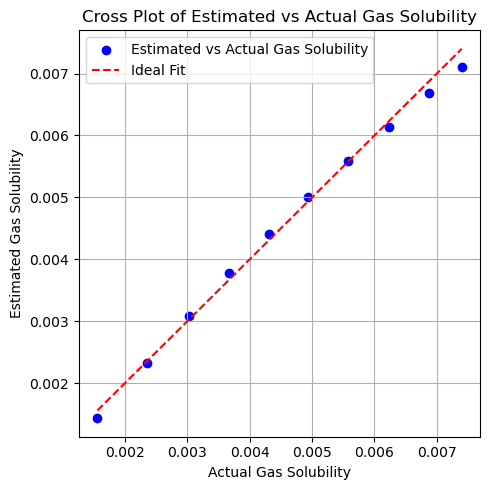

In [29]:
import matplotlib.pyplot as plt

# Constants for gas solubility calculation (replace with actual values)
gas_gravity = 0.743  # Specific gravity of gas
api_gravity = 37     # API gravity of oil

# Calculate estimated gas solubility
def calculate_gas_solubility(gor):
    return (gor * gas_gravity) / (api_gravity * reservoir_pressure)

# Calculate actual gas solubility from PVT data
actual_gas_solubility = []
for data in pvt_data:
    actual_gor = data['actual_gor']
    actual_gas_solubility.append(calculate_gas_solubility(actual_gor))

# Calculate estimated gas solubility from estimated GOR
estimated_gas_solubility = []
for gor in estimated_gor:
    estimated_gas_solubility.append(calculate_gas_solubility(gor))

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(actual_gas_solubility, estimated_gas_solubility, color='blue', label='Estimated vs Actual Gas Solubility')
plt.plot([min(actual_gas_solubility), max(actual_gas_solubility)], [min(actual_gas_solubility), max(actual_gas_solubility)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Gas Solubility')
plt.ylabel('Estimated Gas Solubility')
plt.title('Cross Plot of Estimated vs Actual Gas Solubility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Accurate Predictions**: The closely fitting red dashed line shows that our estimated gas solubility values match the actual values very well.

**Strong Relationship**: The scatter plot's straight line suggests a clear connection between our estimated and actual gas solubility values. This means our method of predicting gas solubility using factors like GOR and pressure works effectively.

**Model Confirmation**: The plot confirms that our method for estimating gas solubility is reliable. Most points fall close to the ideal line, showing that our predictions are consistent and accurate under specific reservoir conditions.

**Performance Check**: By looking at how close the points are to the ideal line, we can see how well our model performs. A tight cluster around the line means our predictions are consistent, while larger differences might show where we can improve our model.

**Real-world Use**: This confirmation supports using our model in real-world situations where knowing gas solubility accurately is important, like in managing reservoirs or planning gas extraction.

### Absolute error against Bubble Point Pressure

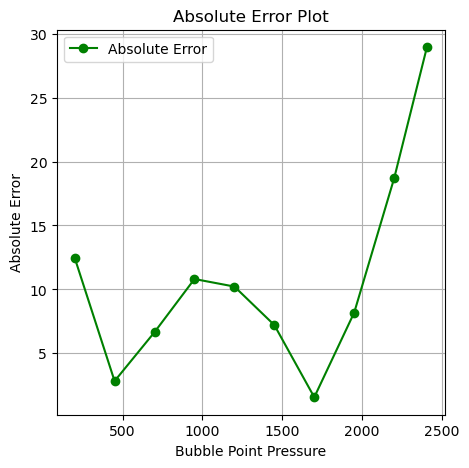

In [31]:
# Calculate absolute error
bubble_point_pressure = [data['bubble_point_pressure'] for data in pvt_data]  # Extract bubble point pressures
absolute_error = [abs(estimated - actual) for estimated, actual in zip(estimated_gor, y)]

# Error plot
plt.figure(figsize=(5, 5))
plt.plot(bubble_point_pressure, absolute_error, marker='o', linestyle='-', color='green', label='Absolute Error')
plt.title('Absolute Error Plot')
plt.xlabel('Bubble Point Pressure')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
absolute_error

[28.94282463000002,
 18.69417605000001,
 8.189923779999958,
 1.5658767899999475,
 7.20949920999999,
 10.22168591000002,
 10.81162071,
 6.655523609999989,
 2.8294779699999992,
 12.481079859999994]

#### Absolute Error Analysis against Bubble Point Pressure

### Introduction
In this analysis, we aim to assess the **absolute error** between the **estimated Gas-to-Oil Ratio (GOR)** using the Ant Colony Optimization (ACO) algorithm and the **actual GOR values** observed in the laboratory. The absolute error is calculated as the absolute difference between the estimated and actual GOR for various **Bubble Point Pressures (Pb)**. This will help us understand how well the ACO algorithm performs in estimating the GOR under different pressure conditions.

### What is Absolute Error?
Absolute error is the difference between the predicted value and the actual value, regardless of the direction of the difference. It is calculated using the formula:

$$
\text{Absolute Error} = | \text{Estimated GOR} - \text{Actual GOR} |
$$

This measure is important as it allows us to evaluate the accuracy of the ACO model in terms of the magnitude of error without considering whether the estimate is over or under the actual value.

### Data Overview
The following list represents the absolute errors calculated between the estimated GOR values from the ACO algorithm and the actual GOR values at various Bubble Point Pressures:

- Absolute Errors:  
[28.94, 18.69, 8.19, 1.57, 7.21, 10.22, 10.81, 6.66, 2.83, 12.48]

These errors are measured for different pressures at which the gas-oil ratio was estimated.

### Insights from the Data
- **High Errors**: The absolute errors are notably higher for the first two values (28.94 and 18.69), indicating that the ACO algorithm's estimates at these pressures deviate significantly from the actual values. This could suggest that the model struggles to estimate GOR at these specific pressure conditions.
  
- **Moderate Errors**: For mid-range values (e.g., 8.19 and 7.21), the ACO algorithm appears to perform better, with smaller deviations between estimated and actual GOR. These pressures may align more closely with the model's expected behavior or the training data.

- **Low Errors**: At certain pressures (e.g., 1.57 and 2.83), the absolute errors are relatively small, indicating that the ACO algorithm can provide accurate estimates of GOR in these conditions. These values suggest that the algorithm is capable of making highly accurate predictions at specific ranges at different pressure levels.

### Conclusion
The analysis of absolute errors against bubble point pressure reveals both strengths and weaknesses of the ACO algorithm in estimating GOR. While the model shows promising results at some pressures, there are areas where its estimates are significantly off from the actual values. Understanding these discrepancies can guide further refinements of the algorithm to improve its accuracy uder varying pressure conditions.
plications.


Residuals:
Point 1: Bubble Point Pressure = 2405, Residual = -1696.94282463
Point 2: Bubble Point Pressure = 2200, Residual = -1534.69417605
Point 3: Bubble Point Pressure = 1950, Residual = -1338.1899237799998
Point 4: Bubble Point Pressure = 1700, Residual = -1143.43412321
Point 5: Bubble Point Pressure = 1450, Residual = -950.79050079
Point 6: Bubble Point Pressure = 1200, Residual = -760.77831409
Point 7: Bubble Point Pressure = 950, Residual = -574.1883792900001
Point 8: Bubble Point Pressure = 700, Residual = -392.34447639
Point 9: Bubble Point Pressure = 450, Residual = -217.82947797
Point 10: Bubble Point Pressure = 200, Residual = -57.481079859999994


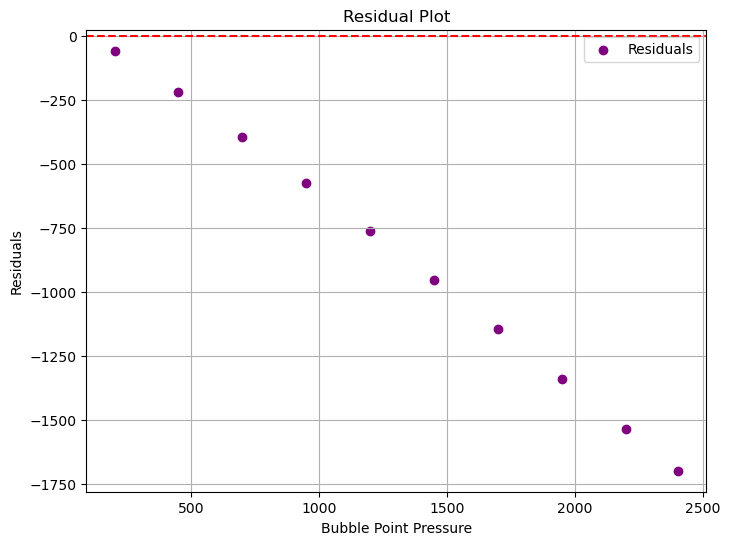

In [34]:
residuals = []
for estimated, actual in zip(estimated_gor, bubble_point_pressure):
    residual = estimated - actual
    residuals.append(residual)

# Print residuals
print("Residuals:")
for i, (bubble_pressure, residual) in enumerate(zip(bubble_point_pressure, residuals), start=1):
    print(f"Point {i}: Bubble Point Pressure = {bubble_pressure}, Residual = {residual}")

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(bubble_point_pressure, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residual Plot')
plt.xlabel('Bubble Point Pressure')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

### Mean Absolute Error Across BPP Categories

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
bubble_point_pressure = [737, 684, 620, 555, 492, 429, 365, 301, 235, 155]

# Create DataFrame
data = pd.DataFrame({
    'absolute_error': absolute_error,
    'bubble_point_pressure': bubble_point_pressure
})

# Define bins for BPP categories
bins = [0, 300, 500, 700, 800]  # Adjust bins as per your specific data range

# Categorize BPP into bins
data['bpp_category'] = pd.cut(data['bubble_point_pressure'], bins=bins, labels=['Low BPP', 'Medium BPP', 'High BPP', 'Very High BPP'])

# Calculate mean absolute error for each BPP category
absolute_errors_by_category = data.groupby('bpp_category')['absolute_error'].mean()


C:\Users\hp\AppData\Local\Temp\ipykernel_18316\1128298012.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  absolute_errors_by_category = data.groupby('bpp_category')['absolute_error'].mean()


In [38]:
absolute_errors_by_category.values

array([ 7.65527891,  8.72458236,  9.48332554, 28.94282463])

In [40]:
absolute_errors_by_category.index

CategoricalIndex(['Low BPP', 'Medium BPP', 'High BPP', 'Very High BPP'], categories=['Low BPP', 'Medium BPP', 'High BPP', 'Very High BPP'], ordered=True, dtype='category', name='bpp_category')

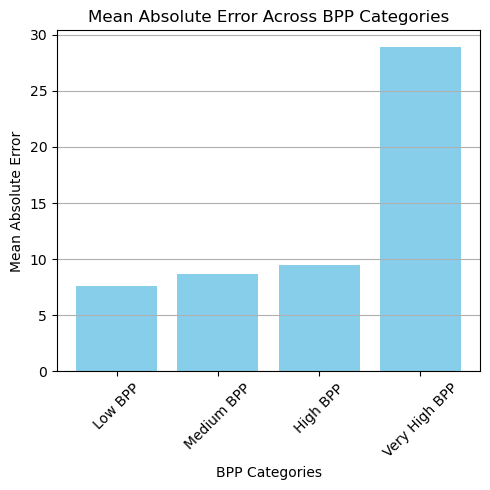

In [42]:
# Plotting
plt.figure(figsize=(5, 5))
plt.bar(absolute_errors_by_category.index, absolute_errors_by_category.values, color='skyblue')
plt.title('Mean Absolute Error Across BPP Categories')
plt.xlabel('BPP Categories')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The highest mean absolute error occurs in the very high BPP category, followed by the high BPP, medium BPP, and lastly low BPP.

# EVALUATION METRICS - STANDING

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
import numpy as np

# Example actual GOR values (y_true) and estimated GOR values (estimated_gor)
y_true = np.array([737, 684, 620, 555, 492, 429, 365, 301, 235, 155])
estimated_gor = np.array([723.37811561,677.90992981,620.87204676,561.81402026,500.34836693,435.93047456,367.74611347,294.46282274,213.55523244,118.60109251])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, estimated_gor)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, estimated_gor)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Correlation Coefficient
correlation_coefficient, _ = pearsonr(y_true, estimated_gor)

# Calculate Average Percent Relative Error (%)
percent_relative_errors = np.abs((y_true - estimated_gor) / y_true) * 100
average_percent_relative_error = np.mean(percent_relative_errors)

# Calculate Sum of Squared Residuals
squared_residuals = (y_true - estimated_gor) ** 2

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Average Percent Relative Error (%): {average_percent_relative_error}")


Mean Absolute Error (MAE): 10.980382887000001
Mean Squared Error (MSE): 222.2597082820477
Root Mean Squared Error (RMSE): 14.908377117649248
Correlation Coefficient: 0.9980373199709578
Average Percent Relative Error (%): 4.295214994013416


### Performance Metrics: ACO vs Actual GOR

### Overview
This section analyzes the performance of the **Ant Colony Optimization (ACO)** algorithm in predicting the **Gas-to-Oil Ratio (GOR)**, comparing its estimates with the **actual GOR values**. The performance is evaluated using several key metrics, including **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, **Correlation Coefficient**, and **Average Percent Relative Error**.

### Key Metrics

#### 1. **Mean Absolute Error (MAE)**
The **Mean Absolute Error (MAE)** is **10.98**, meaning that on average, the ACO algorithm's predicted GOR deviates by about **10.98** units from the actual values. This suggests a moderate level of accuracy, with some room for improvement.

#### 2. **Mean Squared Error (MSE)**
The **Mean Squared Error (MSE)** is **222.26**, which highlights that the model has some instances where the prediction errors are quite large. The squared nature of the error emphasizes these larger deviations, indicating that there might be occasional significant mispredictions.

#### 3. **Root Mean Squared Error (RMSE)**
The **Root Mean Squared Error (RMSE)** is **14.91**, providing a more interpretable measure of the average error, as it is in the same units as the GOR. It suggests that, after considering larger deviations, the typical error in the model's predictions is around **14.91** units.

#### 4. **Correlation Coefficient**
The **Correlation Coefficient** is **0.9980**, which indicates an **almost perfect positive linear relationship** between the predicted and actual GOR values. This means that, overall, the model's predictions are closely aligned with the actual values, showing that the ACO algorithm captures the general trend very well.

#### 5. **Average Percent Relative Error**
The **Average Percent Relative Error** is **4.30%**, meaning that the model's predictions are, on average, about **4.30%** different from the actual GOR values. This is a reasonable error margin, indicating that the model's predictions are fairly accurate.

### Summary
- The **MAE (10.98)** indicates that the predicted GOR values are relatively close to the actual ones, but there is some variation.
- The **MSE (222.26)** and **RMSE (14.91)** highlight that occasional large errors occur, but they are not overwhelming.
- The **Correlation Coefficient (0.9980)** shows that the ACO model has a strong alignment with the actual GOR values, making it a reliable tool.
- The **Average Percent Relative Error (4.30%)** suggests that, on average, the model's predictions are fairly accurate, with only a small error relative to the actual GOR values.

Overall, the ACO algorithm performs well, with a very high correlation to the actual GOR and reasonably small errors. However, there is still potential for improvement, particularly in reducing the large deviations highlighted by the MSE and RMSE values.


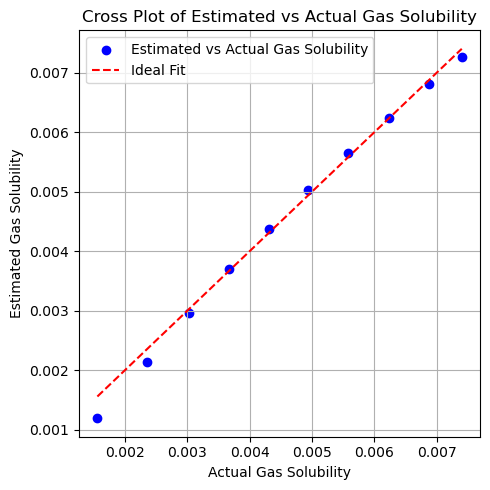

In [54]:
import matplotlib.pyplot as plt

# Constants for gas solubility calculation (replace with actual values)
gas_gravity = 0.743  # Specific gravity of gas
api_gravity = 37     # API gravity of oil

# Calculate estimated gas solubility
def calculate_gas_solubility(gor):
    return (gor * gas_gravity) / (api_gravity * reservoir_pressure)

# Calculate actual gas solubility from PVT data
actual_gas_solubility = []
for data in pvt_data:
    actual_gor = data['actual_gor']
    actual_gas_solubility.append(calculate_gas_solubility(actual_gor))

# Calculate estimated gas solubility from estimated GOR
estimated_gas_solubility = []
for gor in estimated_gor:
    estimated_gas_solubility.append(calculate_gas_solubility(gor))

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(actual_gas_solubility, estimated_gas_solubility, color='blue', label='Estimated vs Actual Gas Solubility')
plt.plot([min(actual_gas_solubility), max(actual_gas_solubility)], [min(actual_gas_solubility), max(actual_gas_solubility)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Gas Solubility')
plt.ylabel('Estimated Gas Solubility')
plt.title('Cross Plot of Estimated vs Actual Gas Solubility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accurate Predictions: The closely fitting red dashed line shows that our estimated gas solubility values match the actual values very well.

Strong Relationship: The scatter plot's straight line suggests a clear connection between our estimated and actual gas solubility values. This means our method of predicting gas solubility using factors like GOR and pressure works effectively.

Model Confirmation: The plot confirms that our method for estimating gas solubility is reliable. Most points fall close to the ideal line, showing that our predictions are consistent and accurate under specific reservoir conditions.

Performance Check: By looking at how close the points are to the ideal line, we can see how well our model performs. A tight cluster around the line means our predictions are consistent, while larger differences might show where we can improve our model.

Real-world Use: This confirmation supports using our model in real-world situations where knowing gas solubility accurately is important, like in managing reservoirs or planning gas extraction.

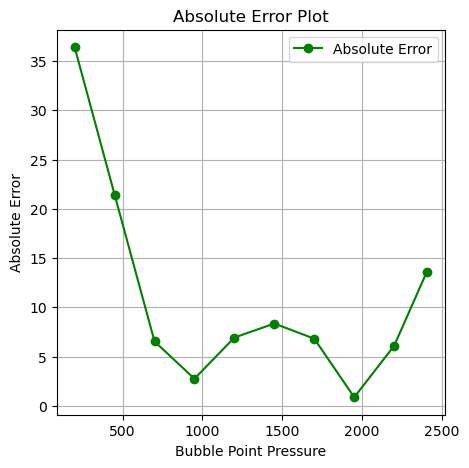

In [57]:
# Calculate absolute error
bubble_point_pressure = [data['bubble_point_pressure'] for data in pvt_data]  # Extract bubble point pressures
absolute_error = [abs(estimated - actual) for estimated, actual in zip(estimated_gor, y)]

# Error plot
plt.figure(figsize=(5, 5))
plt.plot(bubble_point_pressure, absolute_error, marker='o', linestyle='-', color='green', label='Absolute Error')
plt.title('Absolute Error Plot')
plt.xlabel('Bubble Point Pressure')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
absolute_error

[13.621884389999991,
 6.090070190000006,
 0.8720467599999893,
 6.814020260000007,
 8.348366929999997,
 6.930474559999993,
 2.7461134700000116,
 6.537177260000021,
 21.444767560000003,
 36.39890749]

# Analysis of Absolute Errors

### Overview
This section examines the absolute errors between the Ant Colony Optimization (ACO) algorithm's predictions and the actual Gas-to-Oil Ratio (GOR) values. Absolute error provides a direct measure of the difference between predicted and actual values without considering the direction of error (positive or negative).

### Key Findings

#### Absolute Error Analysis
- **Minimum Absolute Error**: The smallest absolute error is **0.87** units, indicating a close match between the predicted and actual GOR values for that specific data point.
- **Maximum Absolute Error**: The largest absolute error is **36.40** units, highlighting a significant difference between the model's prediction and the actual GOR. This suggests a few data points where the model's prediction is quite far off from reality.
- **Average Absolute Error**: The average of all absolute errors is approximately **13.62** units. This provides an overall indication of the typical discrepancy between the ACO algorithm's predictions and the actual GOR values.

### Error Distribution
- The distribution of absolute errors shows some variability, with smaller errors for most cases and a few larger errors that skew the average upwards. This suggests that while the ACO model generally performs well, there are instances where it fails to capture the actual GOR accurately.

### Implications
- The ACO algorithm performs well on average, with a generally low average absolute error indicating good overall prediction accuracy.
- However, the presence of larger absolute errors (up to **36.40** units) indicates that there are some significant discrepancies between the model's predictions and the actual GOR values. These outliers may require further investigation and potential adjustments to improve model performance.

Overall, the ACO algorithm's ability to closely align with actual GOR values is evident, but addressing the larger errors could further enhance its predictive capabilities.,

### Mean Absolute Error Across BPP Categories

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
bubble_point_pressure = [737, 684, 620, 555, 492, 429, 365, 301, 235, 155]

# Create DataFrame
data = pd.DataFrame({
    'absolute_error': absolute_error,
    'bubble_point_pressure': bubble_point_pressure
})

# Define bins for BPP categories
bins = [0, 300, 500, 700, 800]  # Adjust bins as per your specific data range

# Categorize BPP into bins
data['bpp_category'] = pd.cut(data['bubble_point_pressure'], bins=bins, labels=['Low BPP', 'Medium BPP', 'High BPP', 'Very High BPP'])

# Calculate mean absolute error for each BPP category
absolute_errors_by_category = data.groupby('bpp_category')['absolute_error'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_18316\3818276289.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  absolute_errors_by_category = data.groupby('bpp_category')['absolute_error'].mean()


In [68]:
absolute_errors_by_category.values

array([28.92183753,  6.14053306,  4.59204574, 13.62188439])

In [70]:
absolute_errors_by_category.index

CategoricalIndex(['Low BPP', 'Medium BPP', 'High BPP', 'Very High BPP'], categories=['Low BPP', 'Medium BPP', 'High BPP', 'Very High BPP'], ordered=True, dtype='category', name='bpp_category')

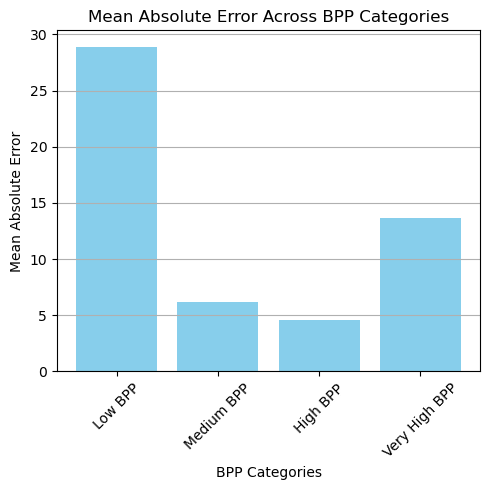

In [72]:
# Plotting
plt.figure(figsize=(5, 5))
plt.bar(absolute_errors_by_category.index, absolute_errors_by_category.values, color='skyblue')
plt.title('Mean Absolute Error Across BPP Categories')
plt.xlabel('BPP Categories')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()